In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import string

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.weight'] = 'bold'

# Merge times

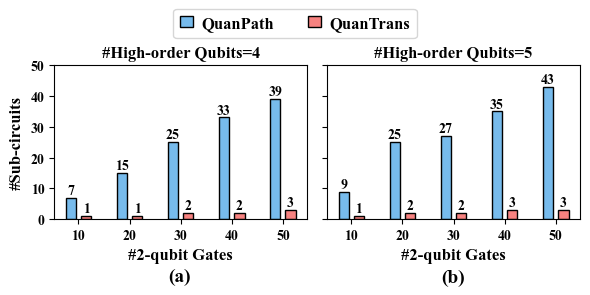

In [5]:
fname = 'QuanTrans_data.xlsx'
sheetname = 'mtimes'
df = pd.read_excel(fname, sheet_name=sheetname)

header = df.columns.to_list()
methods = header[2:]

colors = {
    'QuanPath': '#77bbec',
    'QuanTrans': '#f78280',
    'edge': 'black',
}

numHRange = df['h'].unique()
numGatesRange = df['#2-qubit Gates'].unique()

fig, axes = plt.subplots(1, len(numHRange), figsize=(3 * len(numHRange), 3), sharey=True) # sharey

handles = []
labels  = []

width = 2
space = 1

for i, ax in enumerate(axes):
    h = numHRange[i] # 4/5
    
    # mark the number in the lower center of the first subgraph in each row
    label = f'({string.ascii_lowercase[i]})'
    ax.text(0.45, -0.4, label, transform=ax.transAxes, fontsize=14)
    
    mtimesData = df.loc[(df['h']==h)]
#     print(mtimesData)
    
    numGatesRange = mtimesData.loc[:, '#2-qubit Gates'].values
    mtimesPath  = mtimesData.loc[:, 'QuanPath'].values
    mtimesTrans = mtimesData.loc[:, 'QuanTrans'].values
        
#     print(f'[DEBUG] {numGatesRange} {mtimesPath} {mtimesTrans}')
    
    # draw bars
    ax.bar(numGatesRange, mtimesPath, width, label='QuanPath', color=colors['QuanPath'], edgecolor=colors['edge'])
    ax.bar([x+width+space for x in numGatesRange], mtimesTrans, width, label='QuanTrans', color=colors['QuanTrans'], edgecolor=colors['edge'])
    
    # mark values
    for j in range(len(numGatesRange)):
        numGates = numGatesRange[j]
        ax.text(numGates, mtimesPath[j]+space/4, str(mtimesPath[j]), ha='center', va='bottom')
        ax.text(numGates+width+space, mtimesTrans[j]+space/4, str(mtimesTrans[j]), ha='center', va='bottom')
        
    # subgraph titles
    ax.set_title(f'#High-order Qubits={h}', fontweight='bold')
    
    # set x axis
    ax.set_xticks([x + width/2 + space/2 for x in numGatesRange])
    ax.set_xticklabels(numGatesRange)
    
    ax.set_xlabel('#2-qubit Gates', fontsize=12, fontweight='bold')
    
    # set y axis
    ax.set_ylim(0, 50)

    if i == 0:
        # labels
        barHandles, barLabels = ax.get_legend_handles_labels()
        handles.extend(barHandles)
        labels.extend(barLabels)

        ax.set_ylabel('#Sub-circuits', fontsize=12, fontweight='bold')


fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=12, handlelength=0.8, handletextpad=0.5)

plt.tight_layout()
# plt.subplots_adjust(wspace=0)

# plt.savefig(f'{sheetname}.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Real circuits
20 qubits

[INFO] numTasksRange: ['VQC529' 'VQC2' 'VQC3']


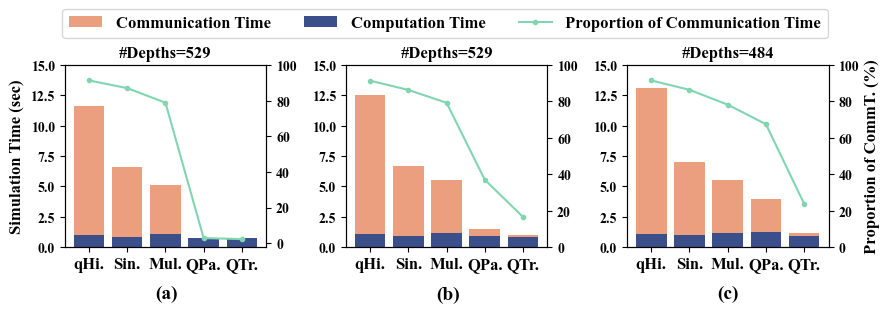

In [6]:
'''
Load computation time and communication time
'''
fname = 'QuanTrans_data.xlsx'
sheetname = 'real'
df = pd.read_excel(fname, sheet_name=sheetname)

header = df.columns.to_list()
methods = header[3:]

blue, orange, purple, green = '#3b4f8b', '#eb9f7e', '#83639f', '#449945'

colors = {
    'comp': blue,
    'comm': orange,
    'propt': '#81d5b0',
}

abbrs = {
    'qHiPSTER': 'qHi.',
    'SingleQE': 'Sin.',
    'MultiQE': 'Mul.',
    'QuanPath': 'QPa.',
    'QuanTrans': 'QTr.',
}

numTasksRange = df['Task'].unique()

print(f'[INFO] numTasksRange: {numTasksRange}')

fig, axes = plt.subplots(1, len(numTasksRange), figsize=(3 * len(numTasksRange), 3), sharey=False) # sharey

handles = []
labels  = []

for i, ax in enumerate(axes):

    task = numTasksRange[i]
    
    # mark the number in the lower center of the first subgraph in each row
    label = f'({string.ascii_lowercase[i]})'
    ax.text(0.45, -0.28, label, transform=ax.transAxes, fontsize=14)

    # ax_left: get compT. and commT. data from the dataframe
    compData = df.loc[(df['Task']==task) & (df['Type']=='computation')]
    commData = df.loc[(df['Task']==task) & (df['Type']=='communication')]
    
    numDepths = df.loc[i * 2, '#Depths']
    compT = compData.loc[:, methods].values[0]
    commT = commData.loc[:, methods].values[0]

    ax.bar(methods, commT, bottom=compT, label='Communication Time', color=colors['comm'])
    ax.bar(methods, compT, label='Computation Time', color=colors['comp'])

    # ax_right: calculate the propt. of commT, i.e., commT./(compT.+commT.)
    propt = 100 * commT / (commT + compT)
    ax_propt = ax.twinx()
    ax_propt.plot(methods, propt, color=colors['propt'], label='Proportion of Communication Time', marker='.')

    # set title, get labels
    ax.set_title(f'#Depths={numDepths}', fontweight='bold')
    
    if i == 0:
        barHandles, barLabels = ax.get_legend_handles_labels()
        handles.extend(barHandles)
        labels.extend(barLabels)
    elif i == len(numTasksRange) - 1: # set legend
        lineHandles, lineLabels = ax_propt.get_legend_handles_labels()
        handles.extend(lineHandles)
        labels.extend(lineLabels)
        
    # set x labels
    # ax.set_xlabel('Methods')
    ax.set_xticks(np.arange(len(methods)))
    ax.set_xticklabels([abbrs[method] for method in methods], fontsize=12) # rotation=90

    ax.set_yticks([0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0])
    ax_propt.set_yticks([0, 20, 40, 60, 80, 100])

    if i == 0: # the first column
        ax.set_ylabel('Simulation Time (sec)', fontsize=12, fontweight='bold')
        ax.yaxis.set_visible(True)
        ax.spines['left'].set_visible(True)
    elif i == len(numTasksRange) - 1: # the last column
        ax_propt.set_ylabel('Proportion of CommT. (%)', fontsize=12, fontweight='bold')
        ax_propt.yaxis.set_visible(True)
        ax.spines['right'].set_visible(True)


fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=12)

plt.tight_layout()
# plt.subplots_adjust(wspace=0)

# plt.savefig(f'{sheetname}.pdf', format='pdf', bbox_inches='tight')
plt.show()